# 랭크와 텐서

* **텐서** : 데이터를 담고 있는 다차원 배열
* **랭크** : 텐서의 차원

scalar는 랭크 0인 텐서이다. 벡터는 랭크 1인 텐서이다. 행렬은 랭크 2인 텐서이다. 텐서 표기는 더 고차원으로 일반화 될 수 있다. 

In [1]:
import tensorflow as tf
import numpy as np

In [0]:
tf.enable_eager_execution() # 즉시 실행 모드

 ### 텐서의 랭크와 크기 확인

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


### 텐서를 다차원 배열로 변환하기

In [4]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-0.10933766, -0.16379913,  0.20175636, -0.87374367],
       [ 0.24752828,  0.17027973,  1.02097843, -2.52254804],
       [ 1.08687773, -1.40326481,  0.03719523, -1.58355184]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([-0.5114921 , -1.06038134,  0.06355174])>


#### 텐서의 크기 변경

In [5]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


#### transpose

In [6]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


#### 텐서 나누기

In [7]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=36, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=37, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


#### 텐서 연결

In [8]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


# 텐서 배열의 구조 다루기

In [9]:
print(tf.__version__)
print(tf.executing_eagerly())

1.15.0
True


In [10]:
w = tf.Variable(2.0, name='w')
b = tf.Variable(0.7, name='b')

for x in [1.0, 0.6, -1.8] :
    z = w*x + b
    print('x=%4.1f --> z=%4.1f'%(x, z))


x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [0]:
import numpy as np

In [0]:
x_arr = np.arange(18).reshape(3,2,3)
x2 = tf.reshape(x_arr, shape=(-1,6))

In [0]:
# 각 열의 합을 계산
xsum = tf.reduce_sum(x2, axis=0)
# 각 열의 평균을 계산
xmean = tf.reduce_mean(x2, axis=0)

In [14]:
print('x_array 크기 : ', x_arr.shape)
print('크기 변형 : \n', x2.numpy())
print('열의 합 : ', xsum.numpy())
print('열의 평균 : ', xmean.numpy())

x_array 크기 :  (3, 2, 3)
크기 변형 : 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
열의 합 :  [18 21 24 27 30 33]
열의 평균 :  [ 6  7  8  9 10 11]


### 텐서 연산
텐서플로의 공식 문서를 참조 

https://www.tensorflow.org/api_docs/python/tf

# 계산 그래프의 이해

계산 그래프를 만든 후 세션을 통해 그래프를 실행한다.
1. 비어있는 계산그래프 생성
2. 계산 그래프에 노드(텐서와 연산)을 추가
3. 그래프 실행
    * 새로운 새션을 시작
    * 그래프에 있는 변수를 초기화
    * 계산 그래프를 실행

In [15]:
g = tf.Graph() # 명시적으로 그래프를 지정하지 않으면 기본 그래프가 사용된다.
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


# 변수
훈련과정 동안 모형 파라미터를 저장하고 업데이트 할 수 있다. 예를 들면 모형의 가중치. 변수를 정의할 때 초기 텐서 값을 지정해야 한다. 

tf.Variable을 통해 변수를 지정하는데 shape이나 type을 지정할 수 없다. 크기와 타입은 초기값과 동일하게 설정된다. 

In [16]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64_ref>


변수 w1에는 실제 값이 포함되지 않았다. 변수를 사용하기 전에는 초기화해 주어야 한다. 

In [17]:
with g1.as_default():
    init = tf.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



#### 변수 사용시 주의점 

run(w1)을 여러번 하더라도 변수의 값이 증가하지 않는다.

assign() 메서드를 사용해서 변수의 값을 증가하는 연산을 만들어야 한다.

In [18]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.Session(graph=g1) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [19]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.Session(graph=g2) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


# 텐서플로 저수준 API로 모델 개발

입력 데이터를 위해 **placeholder(플레이스 홀더)** 를 정의한다. 그리고 가중치 행렬을 정의하고 입력에서 출력으로 연결된 **모형을 생성**한다. 최적화를 위해서 **손실 함수 또는 비용함수를 정의하고 어떤 최적화 알고리즘**을 사용할 지 결정한다. 그 다음 **세션을 만들고 변수를 초기화** 한다. shape=(None)로 placeholder x를 만들었다. 입력 데이터 크기를 지정하지 않았으므로 한번에 전체 데이터를 전달하여 하나씩 **모델에 주입**할 수 있다. 

In [0]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

In [0]:
X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

* z = wx + b 형태로 선형 회귀 모델을 정의한 후 평균 제곱 오차를 비용 함수를 정의한다. 
* 학습을 위하여 경사 하강법 옵티마이저를 사용한다.

In [0]:
class LinearReg(object):
    def __init__(self, learning_rate=0.01):
        ## 가중치와 절편을 정의합니다
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        ## 경사 하강법 옵티마이저를 설정합니다.
        #self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        
    def fit(self, X, y, num_epochs=10):
        ## 비용 함수의 값을 저장하기 위한 리스트를 정의합니다.
        training_costs = []
        for step in range(num_epochs):
            ## 자동 미분을 위해 연산 과정을 기록합니다.
            with tf.GradientTape() as tape:
                z_net = self.w * X + self.b
                z_net = tf.reshape(z_net, [-1])
                sqr_errors = tf.square(y - z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            ## 비용 함수에 대한 가중치의 그래디언트를 계산합니다.
            grads = tape.gradient(mean_cost, [self.w, self.b])
            ## 옵티마이저에 그래디언트를 반영합니다.
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            ## 비용 함수의 값을 저장합니다.
            training_costs.append(mean_cost.numpy())
        return training_costs
    
    def predict(self, X):
        return self.w * X + self.b

In [0]:
lr = LinearReg()
train_cost = lr.fit(X_train, y_train)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

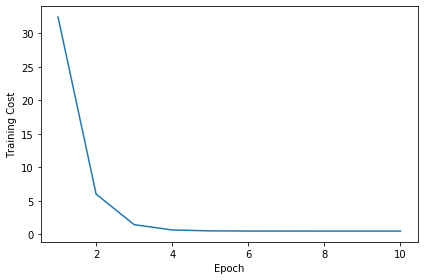

In [25]:
plt.plot(range(1,len(train_cost) + 1), train_cost)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.tight_layout()
plt.show()

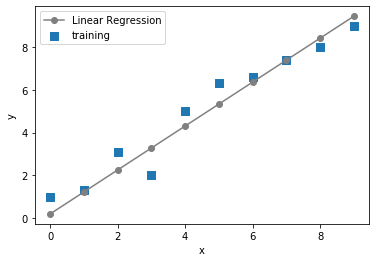

In [26]:
plt.scatter(X_train, y_train, marker='s', s=50, label='training')
plt.plot(range(X_train.shape[0]),lr.predict(X_train), marker='o', color='gray',label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()